# WAMIDA Statistical Analysis


This Jupyter notebook displays the statistical processing of the WAMIDA data. Note that the imported data is only available locally on a host machine and this code will not run without the exact same filename accessible by this notebook

## Method:

Analysis has 3 components

**1. Data Prepocessing and Cleaning**

Data is cleaned, with irrelevant data removed, including analysis of Variance Inflation Factor for colinearity and a confusion matrix to highlight low variance variables. Categorical variables are changed into dummy variables for binary categories.

**2. Exploratory Data Analysis**

We can conduct a Mann-Whitney U test for continuous data and Fisher exact test for binary data. We can also compute Pearson correlation coefficients as well. Note that the p-values are not representative of how significant a logistic fit is (this is what we really want in the end), but this can allow us to be exploratory to see which variables are very viable or very unviable for logistic regression fit.

**3. Logistic Regression, Refactoring Low Significance Variables and Re-fitting**

The remaining significant data is placed into a logistic regression model using a maximum likelihood estimate algorithm. The odds ratio of each variable is reported along with P-value The high-p variables are removed and then logistic regression is re-fitted to achieve a higher accruacy fit. Odds ratios can then be reported.

# 1. Preprocessing

In [133]:
# Setup, imports
import math
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from patsy import dmatrices
import statsmodels.api as sm 
import seaborn as sn
from scipy.stats import wilcoxon, pearsonr, mannwhitneyu
import scipy.stats as stats
from tableone import TableOne

matplotlib.rcParams['figure.figsize'] = [40, 20]

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
data = pd.read_excel('input.xlsx')
#dropping irrelevant or incomplete columns
data = data.drop(columns = ['Study ID', 'Deceased'])
#dropping columns with lots of NaNs and then rows with some NaNs
data = data.dropna(axis = 1, thresh = 100)
data = data.dropna(axis = 0)
#Age has a space afterward in the spreadsheet,
cols_num = ['Age ', 'Pack Years', 'Drinks/Week', 'BMI']
data_num = data[cols_num]
data_cat = data.drop(columns = cols_num)
columns = list(data)
categorical = list(data_cat)
data

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Age   Ethnicity  Sex  Education Level  Employment  Income (2019)  \
0      78          0  0.0                0           0            0.0   
1      67          0  1.0                0           1            1.0   
2      80          0  1.0                1           1            1.0   
3      56          0  1.0                1           1            1.0   
4      58          0  0.0                1           1            1.0   
5      82          0  1.0                1           1            1.0   
6      75          0  1.0                1           1            1.0   
7      73          0  0.0                0           1            1.0   
8      67          0  1.0                1           1            1.0   
9      55          0  1.0                1           1            1.0   
10     61          0  0.0                1           1            1.0   
11     65          1  0.0                1           1            1.0   
12     85          0  1.0                0           1            1.0   
13     57          0  0.0                0           1            1.0   
14     56          0  1.0                1           1            1.0   
15     72          0  0.0                0           1            0.0   
16     45          0  1.0                1           1            1.0   
17     72          0  1.0                1           1            1.0   
18     55          0  1.0                1           1            1.0   
19     68          0  0.0                0           1            1.0   
20     60          0  0.0                0           0            0.0   
21     64          0  1.0                1           1            1.0   
22     49          0  1.0                0           1            1.0   
23     52          0  1.0                1           1            1.0   
24     56          0  0.0                0           1            1.0   
25     67          0  1.0                1           1            1.0   
26     74          0  1.0                0           1            1.0   
27     57          0  1.0                0           0            1.0   
28     84          0  0.0                0           1            1.0   
29     50          0  0.0                1           1            1.0   
30     55          0  1.0                1           1            1.0   
31     53          0  1.0                0           0            1.0   
32     76          0  1.0                0           1            1.0   
33     64          0  1.0                0           0            0.0   
34     57          0  1.0                0           0            0.0   
35     79          0  0.0                0           1            1.0   
36     59          0  1.0                0           1            0.0   
37     67          0  1.0                1           1            1.0   
38     53          0  1.0                0           1            1.0   
39     72          0  0.0                0           1            1.0   
40     61          0  0.0                0           1            1.0   
41     67          0  0.0                0           1            1.0   
42     68          0  0.0                1           1            1.0   
43     64          0  1.0                0           1            1.0   
44     57          0  0.0                0           0            1.0   
45     64          0  1.0                0           0            1.0   
46     76          0  1.0                0           1            1.0   
47     66          0  1.0                0           1            1.0   
48     78          0  1.0                1           1            1.0   
49     93          0  0.0                1           1            1.0   
50     63          0  1.0                1           1            1.0   
51     60          0  1.0                1           1            1.0   
52     65          0  1.0                1           1            1.0   
53     84          0  0.0                0           1         

In [15]:
#table1hadsD = TableOne(data, columns=columns, categorical=categorical, pval = True, groupby ='HADS D', smd=True,
#                  htest_name=True)
#table1hadsA = TableOne(data, columns=columns, categorical=categorical, pval = True, groupby ='HADS A', smd=True,
#                  htest_name=True)

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Exploratory Data Analysis

## Testing Colinearity with Variance Inflation Factor, colinear variables would not be of statistical value and would be removed for a regression fit 


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = data.iloc[:,:-3].dropna()
calc_vif(X)


C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


variables        VIF
0                        Age   29.891512
1                   Ethnicity   1.155882
2                         Sex   4.387076
3             Education Level   2.312556
4                  Employment  15.556989
5               Income (2019)  15.051732
6                    Married?   3.595532
7                  Pack Years   2.614776
8                 Drinks/Week   1.404245
9   Hx Substance Use Disorder  26.052886
10              Hx Depression   9.469280
11                Hx Anxiety    7.563425
12             Stroke History  26.827953
13               Previous AMI  10.242068
14        Previous Stent/CABG  13.127815
15           High Cholesterol   2.623495
16                   Diabetes   6.955161
17                        BMI  19.655330

## Before the first exlusion of features, for instance, BMI was colinear with height and weight. Any collinear variables should be excluded. At this point, all VIF is < 10, which means low collinearity, although some papers argue whether the threshold should be 10 or 5 etc.

## We can visualize pearson correlation of the with a correlation matrix 

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


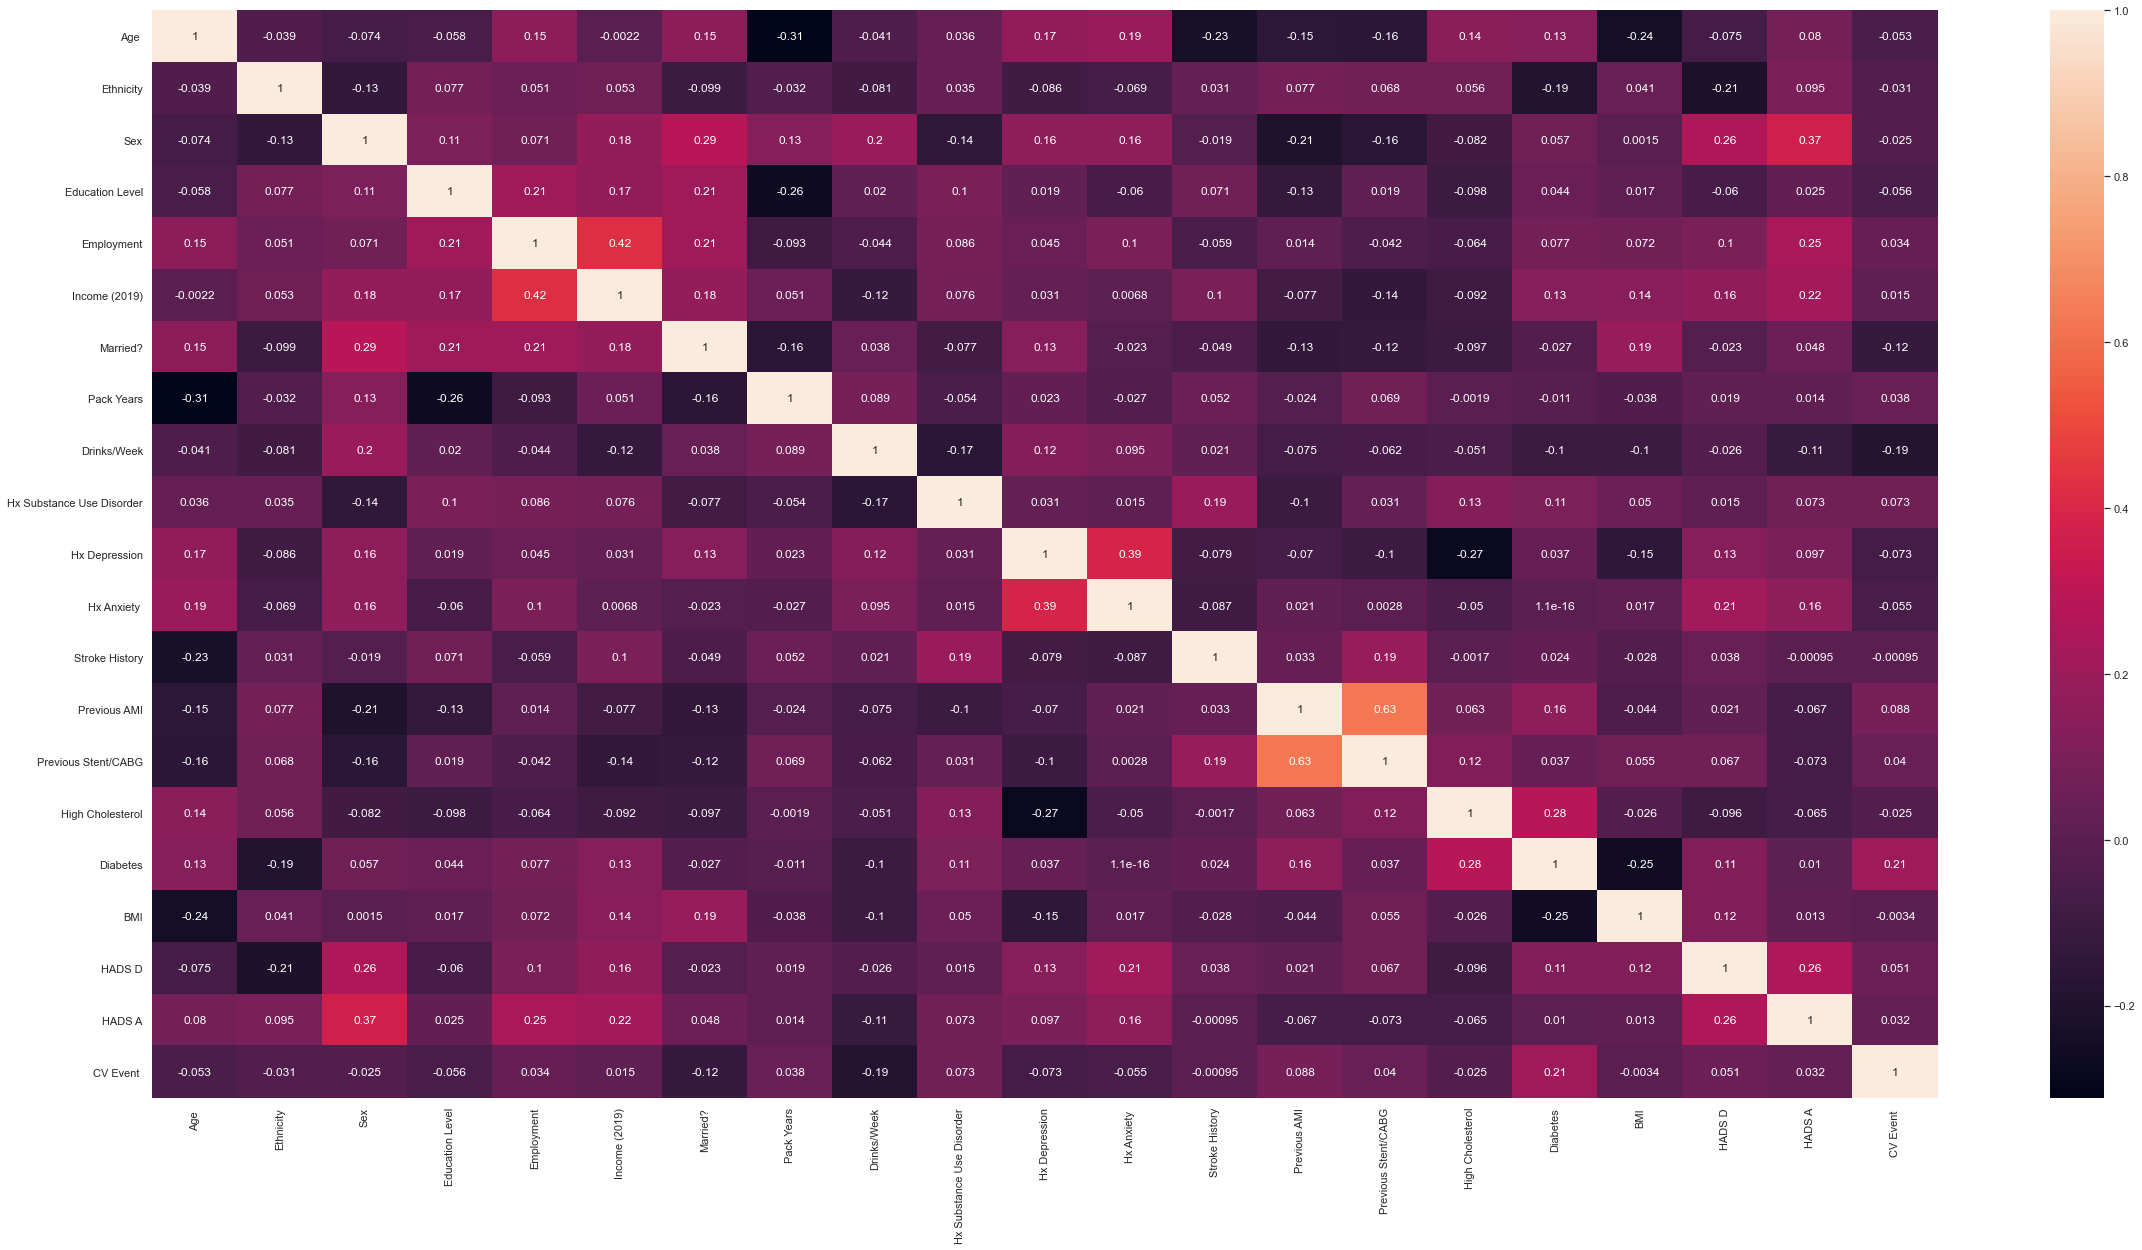

Age   Ethnicity       Sex  Education Level  \
Age                        1.000000  -0.039430 -0.074132        -0.058334   
Ethnicity                 -0.039430   1.000000 -0.133063         0.076556   
Sex                       -0.074132  -0.133063  1.000000         0.106961   
Education Level           -0.058334   0.076556  0.106961         1.000000   
Employment                 0.147239   0.050508  0.070567         0.208413   
Income (2019)             -0.002219   0.053227  0.178030         0.165957   
Married?                   0.150270  -0.099026  0.286987         0.206490   
Pack Years                -0.310818  -0.032349  0.133654        -0.259997   
Drinks/Week               -0.041363  -0.080833  0.195789         0.019690   
Hx Substance Use Disorder  0.035871   0.034893 -0.138129         0.100974   
Hx Depression              0.167111  -0.085541  0.159664         0.019339   
Hx Anxiety                 0.193904  -0.068836  0.155192        -0.060363   
Stroke History            -0.225864   0.031068 -0.018991         0.070760   
Previous AMI              -0.153966   0.077357 -0.207582        -0.130286   
Previous Stent/CABG       -0.162273   0.068165 -0.162465         0.019339   
High Cholesterol           0.141915   0.055980 -0.081858        -0.097624   
Diabetes                   0.130336  -0.190941  0.057166         0.043853   
BMI                       -0.244089   0.041050  0.001494         0.016830   
HADS D                    -0.074934  -0.212766  0.255739        -0.060363   
HADS A                     0.079877   0.095039  0.369738         0.024587   
CV Event                  -0.052909  -0.030587 -0.025183        -0.056199   

                           Employment  Income (2019)  Married?  Pack Years  \
Age                          0.147239      -0.002219  0.150270   -0.310818   
Ethnicity                    0.050508       0.053227 -0.099026   -0.032349   
Sex                          0.070567       0.178030  0.286987    0.133654   
Education Level              0.208413       0.165957  0.206490   -0.259997   
Employment                   1.000000       0.424273  0.207987   -0.093027   
Income (2019)                0.424273       1.000000  0.176411    0.051007   
Married?                     0.207987       0.176411  1.000000   -0.158372   
Pack Years                  -0.093027       0.051007 -0.158372    1.000000   
Drinks/Week                 -0.043500      -0.119670  0.037874    0.088510   
Hx Substance Use Disorder    0.085534       0.075641 -0.076633   -0.054327   
Hx Depression                0.045365       0.031147  0.133855    0.023089   
Hx Anxiety                   0.102659       0.006783 -0.022677   -0.026583   
Stroke History              -0.058583       0.099622 -0.048616    0.052438   
Previous AMI                 0.013892      -0.077192 -0.132678   -0.023886   
Previous Stent/CABG         -0.041584      -0.135454 -0.119325    0.069292   
High Cholesterol            -0.064407      -0.091528 -0.096584   -0.001855   
Diabetes                     0.077152       0.133045 -0.026958   -0.011173   
BMI                          0.072385       0.138870  0.190028   -0.038207   
HADS D                       0.102659       0.162788 -0.022677    0.018584   
HADS A                       0.247182       0.219641  0.047863    0.014494   
CV Event                     0.033988       0.015393 -0.117679    0.038355   

                           Drinks/Week  Hx Substance Use Disorder  ...  \
Age                          -0.041363                   0.035871  ...   
Ethnicity                    -0.080833                   0.034893  ...   
Sex                           0.195789                  -0.138129  ...   
Education Level               0.019690                   0.100974  ...   
Employment                   -0.043500                   0.085534  ...   
Income (2019)                -0.119670                   0.075641  ...   
Married?                      0.037874                  -0.076633  ...   
Pack Years                 

In [76]:
corrMatrix = data.corr()
fig = sn.heatmap(corrMatrix, annot=True)
plt.show()
corrMatrix

## It is interesting to visually inspect correlations of variables with each other depending on the dataset (e.g. if a complex variable like entropy is used then we want to observe its relationship to other abstracted variables), though our main interest is to compute the correlation ratio and its p-value to the outcome of each variable, which we do below:

In [77]:
corrDataHADSA = []
corrDataHADSD = []
corrDataCV = []

for cols in data.columns:
    (r,p) = pearsonr(data[cols], data['HADS A'])
    corrDataHADSA.append([cols, r, p])

for cols in data.columns:
    (r,p) = pearsonr(data[cols], data['HADS D'])
    corrDataHADSD.append([cols, r, p])

for cols in data.columns:
    (r,p) = pearsonr(data[cols], data['CV Event '])
    corrDataCV.append([cols, r, p])

pd.set_option('display.max_rows', None)

corrDFHADSA = pd.DataFrame(corrDataHADSA, columns = ['Var', 'r','p'])
corrDFHADSD = pd.DataFrame(corrDataHADSD, columns = ['Var', 'r','p'])
corrDFCV = pd.DataFrame(corrDataCV, columns = ['Var', 'r','p'])

print("\n HADS A: \n", corrDFHADSA)
print("\n HADS D: \n", corrDFHADSD)
print("\n CV Event: \n", corrDFCV)


 HADS A: 
                           Var         r         p
0                        Age   0.079877  0.396110
1                   Ethnicity  0.095039  0.312335
2                         Sex  0.369738  0.000048
3             Education Level  0.024587  0.794226
4                  Employment  0.247182  0.007739
5               Income (2019)  0.219641  0.018348
6                    Married?  0.047863  0.611481
7                  Pack Years  0.014494  0.877818
8                 Drinks/Week -0.114905  0.221400
9   Hx Substance Use Disorder  0.072575  0.440826
10              Hx Depression  0.096645  0.304190
11                Hx Anxiety   0.156190  0.095534
12             Stroke History -0.000950  0.991958
13               Previous AMI -0.067153  0.475801
14        Previous Stent/CABG -0.072607  0.440629
15           High Cholesterol -0.065124  0.489262
16                   Diabetes  0.010012  0.915426
17                        BMI  0.013051  0.889896
18                     HADS D  0.26184

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## As a preliminary analysis, we can see there are some variables that show some correlation, but the correlation and significance is weak for the most part. This may suggestion that the relationship between the variables to the outcome is nonlinear and linear correlation analysis is insufficient.


# Independent p-values

## We can do some biostat faves and look at MWU values for continuous (comparing to HADS A and HADS D, quasi-continuous, really, since it's all integer data) and Fisher values (comparing to 0/1 of depression or no depression) for binary data. 

## The value of this is that the p-values tell us if the distributions of variables between positive vs. negative outcome has *some significant difference*. This is still valuable to report though there are two mathematical caveats to keep in mind:

1. The p-values look at variables independently. If the relationship can be sufficiently analyzed by linear correlation analysis, then this is great. If the variables are dependent on each other, then there is a chance the traditional p-value may come to a false conclusion. For instance, if pack years is a random predictor by itself but is a strong positive predictor only when drinks/week is within some range, then the p-value would false report that pack years is not significant differently distributed between the outcomes.

2. A p<0.05 (the traditional threshold) tells us the two distributions (e.g. pack years for positive depression vs. pack years for negative depression) has *some significant difference*. This is great for observational statistics ("this variable is important to look at") but requires more work for inferential statistics ("we can use this variable by this weighing formula to predict the outcome") because it doesn't tell us the mathematical nature of the relationship between variables and outcome. Hence, the we can utilize the p-value in two ways: to state that a variable may be significant from an initial linear, independent view and to use as a first-pass filtering of variables if we don't have enough samples to build a model.

# Wilcoxon (Mann-Whitney variant) Test for Continuous Data

## For the variables that are unpaired, continuous, and non-Gaussian (theoretically it should be Gaussian by central limit theorem, but likely not enough samples), the Wilcoxon Mann-Whitney test was chosen and computed below (can't do Wilcoxon because variables are different length)

In [78]:
# extraction variable values for positive and negative outcomes

MWUResults = []
print('Mann-Whitney U test p values for continuous data, comparing distributions of variable values for positive vs. negative outcomes: \n')
for cols in data_num.columns:
    posOutcomeAnx = []
    negOutcomeAnx = []
    posOutcomeDep = []
    negOutcomeDep = []
    posOutcomeCV = []
    negOutcomeCV = []
    if ((cols != 'HADS A') and (cols != 'HADS D') and (cols != 'CV Event ')) :
        for row,val in data_num[cols].iteritems():
            variableVal = data_num[cols][row]
            if data_cat['HADS A'][row] == 0:
                negOutcomeAnx.append(variableVal)
            else:
                posOutcomeAnx.append(variableVal)
            if data_cat['HADS D'][row] == 0:
                negOutcomeDep.append(variableVal)
            else:
                posOutcomeDep.append(variableVal)
            if data_cat['CV Event '][row] == 0:
                negOutcomeCV.append(variableVal)
            else:
                posOutcomeCV.append(variableVal)
        uDep, pAnx = mannwhitneyu(negOutcomeAnx,posOutcomeAnx)
        uDep, pDep = mannwhitneyu(negOutcomeDep,posOutcomeDep)
        uCV, pCV = mannwhitneyu(negOutcomeCV, posOutcomeCV)
    
        MWUResults.append([cols, pAnx, pDep, pCV])

MWUdf = pd.DataFrame(MWUResults, columns = ['cols', 'pAnx','pDep', 'pCV'])
print(MWUdf)

Mann-Whitney U test p values for continuous data, comparing distributions of variable values for positive vs. negative outcomes: 

          cols      pAnx      pDep       pCV
0         Age   0.259645  0.179955  0.378535
1   Pack Years  0.463727  0.498514  0.455984
2  Drinks/Week  0.220637  0.471741  0.265769
3          BMI  0.430974  0.104176  0.293143


C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rckyh\Anaconda3\lib\site-packages\scipy\stats\stats.py:7002: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
C:\Users\rckyh\Anaconda3\lib\site-packages\scipy\stats\stats.py:7002: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarning)
C:\Users\rckyh\Anaconda3\lib\site-packages\scipy\stats\stats.py:7002: DeprecationWarning: Calling `mannwhitneyu` without specifying `alternative` is deprecated.
  "`alternative` is deprecated.", DeprecationWarnin

P-values for continuous variables are quite bad. This is not to say the variables aren't significant, just that under the current dataset shows little linear independent significance. We can still use some data science techniques for predictabilitiy later on.

Perhaps because distributions of data are not Gaussian (they should be if we have enough samples under CLT) as that signifies not enough data has been collected to analyze these variables using techniques that rely on randomizations being balance under a Gaussian distribution (i.e. almost all p-value tests)

# For the binary variables, we use Fisher's Exact Test

## We have to create contingency tables for each variables with respect to the outcome (binary anxiety or binary depression outcomes), then compute the Fisher exact test odds ratio and p-value

In [79]:
print('Fisher exact test values: \n')

fisherResults =[ ]

for cols in data_cat.columns:
    data_crosstabAnx = pd.crosstab(data_cat[cols],data_cat['HADS A'])
    data_crosstabDep = pd.crosstab(data_cat[cols],data_cat['HADS D'])
    data_crosstabCV = pd.crosstab(data_cat[cols],data_cat['CV Event '])
    orAnx, pAnx = stats.fisher_exact(data_crosstabAnx)
    orDep, pDep = stats.fisher_exact(data_crosstabDep)
    orCV, pCV = stats.fisher_exact(data_crosstabCV)
    
    fisherResults.append([cols, orAnx, pAnx, orDep, pDep, orCV, pCV])
    
fisherdf = pd.DataFrame(fisherResults, columns = ['cols', 'orAnx', 'pAnx','orDep','pDep', 'orCV','pCV'])
print(fisherdf)

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fisher exact test values: 

                         cols     orAnx          pAnx     orDep          pDep  \
0                   Ethnicity       inf  5.707053e-01  0.095745  7.772220e-02   
1                         Sex  5.750000  2.599733e-04  3.826087  1.307574e-02   
2             Education Level  1.121528  8.315916e-01  0.727273  6.215327e-01   
3                  Employment  5.347826  1.589783e-02  2.218487  3.749091e-01   
4               Income (2019)  4.226087  2.857988e-02  3.142857  9.771037e-02   
5                    Married?  1.252372  6.601365e-01  0.882479  1.000000e+00   
6   Hx Substance Use Disorder  2.049383  5.987448e-01  1.197368  1.000000e+00   
7               Hx Depression  1.778656  3.648014e-01  2.305556  1.721662e-01   
8                 Hx Anxiety   2.349206  1.535716e-01  3.396450  4.516861e-02   
9              Stroke History  0.988095  1.000000e+00  1.614035  5.395070e-01   
10               Previous AMI  0.649412  5.854433e-01  1.147059  7.593825e-01   


## P-values are all over the place, especially for the binary variables likely due to low frequency and the algorithm thinks it's all due to chance, with the exception of a few variables (sex, Hx Anxiety maybe). Likely more samples are needed to elicit a meaningful Fisher test.

## We can also do a basic linear odds ratio calculation

In [80]:
def getOddsRatios(data, outcome):
    
    ORList = []
    
    for cols in data.columns:
        data_crosstab = pd.crosstab(data[cols],data[outcome])
        tp = data_crosstab.iloc[1][1]
        tn = data_crosstab.iloc[0][0]
        fp = data_crosstab.iloc[1][0]
        fn = data_crosstab.iloc[0][1]
        if(tp == 0 or tn == 0 or fp == 0 or fn == 0):
            tp = tp + 0.5
            tn = tn + 0.5
            fp = fp + 0.5
            fn = fn + 0.5
        
        linOR = (tp*tn)/(fp*fn)
        SE = math.sqrt(1/tp + 1/tn + 1/fp + 1/fn)
        z = math.log(linOR)/SE
        CILow = math.exp(math.log(linOR) - 1.96*SE)
        CIHigh = math.exp(math.log(linOR) + 1.96*SE)
        p=stats.norm.sf(abs(z))*2
        
        ORList.append([cols, linOR, CILow, CIHigh, p])
        
    return ORList

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
ORDep = getOddsRatios(data_cat, 'HADS D')
ORAnx = getOddsRatios(data_cat, 'HADS A')
ORCV = getOddsRatios(data_cat, 'CV Event ')
ORDepDF = pd.DataFrame(ORDep, columns = ['col','OR','CILow','CIHigh','p'])
ORAnxDF = pd.DataFrame(ORAnx, columns = ['col','OR','CILow','CIHigh','p'])
ORCVDF = pd.DataFrame(ORCV, columns = ['col','OR','CILow','CIHigh','p'])

print('HADS D: \n')
print(ORDepDF)
print('HADS A: \n')
print(ORAnxDF)
print('CV Event: \n')
print(ORCVDF)

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


HADS D: 

                          col           OR       CILow         CIHigh  \
0                   Ethnicity     0.095745    0.008238       1.112738   
1                         Sex     3.826087    1.410033      10.381987   
2             Education Level     0.727273    0.276651       1.911886   
3                  Employment     2.218487    0.521026       9.446137   
4               Income (2019)     3.142857    0.823757      11.990862   
5                    Married?     0.882479    0.322048       2.418173   
6   Hx Substance Use Disorder     1.197368    0.126654      11.319723   
7               Hx Depression     2.305556    0.708915       7.498195   
8                 Hx Anxiety      3.396450    1.142695      10.095319   
9              Stroke History     1.614035    0.159176      16.366184   
10               Previous AMI     1.147059    0.340413       3.865134   
11        Previous Stent/CABG     1.576923    0.455371       5.460789   
12           High Cholesterol     0.60000

## 3. Initial Attempt at Logistic Regression

## First removing colinear variables, similar to above. Note that categorical variables are not defined for VIF, colinearity is not well understood for those

In [110]:
data_final = data.drop(columns=[])
data_final.columns

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age ', 'Ethnicity', 'Sex', 'Education Level', 'Employment',
       'Income (2019)', 'Married?', 'Pack Years', 'Drinks/Week',
       'Hx Substance Use Disorder', 'Hx Depression', 'Hx Anxiety ',
       'Stroke History', 'Previous AMI', 'Previous Stent/CABG',
       'High Cholesterol', 'Diabetes', 'BMI', 'HADS D', 'HADS A', 'CV Event '],
      dtype='object')

## Removing low-variance variables

In [111]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold_selector(data, threshold=0.5):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

# min_variance = .9 * (1 - .9)  # You can play here with different values.
X = data_final
min_variance = 0.1
high_var_cols = variance_threshold_selector(X, min_variance) 
print('columns remaining: ', high_var_cols.columns )
print(len(high_var_cols.columns))
X_low_var_removed = data_final[high_var_cols.columns]
X_low_var_removed.columns

columns remaining:  Index(['Age ', 'Sex', 'Education Level', 'Married?', 'Pack Years',
       'Drinks/Week', 'Hx Depression', 'Hx Anxiety ', 'Previous AMI',
       'Previous Stent/CABG', 'High Cholesterol', 'Diabetes', 'BMI', 'HADS D',
       'HADS A', 'CV Event '],
      dtype='object')
16


C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Age ', 'Sex', 'Education Level', 'Married?', 'Pack Years',
       'Drinks/Week', 'Hx Depression', 'Hx Anxiety ', 'Previous AMI',
       'Previous Stent/CABG', 'High Cholesterol', 'Diabetes', 'BMI', 'HADS D',
       'HADS A', 'CV Event '],
      dtype='object')

# Now that no remaining variables are colinear, we can begin regression

# For Anxiety:

In [131]:
def fitLogReg(data, outcome):
    maxParams = math.floor(len(data)/10)
    #dropping other outcomes
    outcomeCol = data[outcome]
    data = data.drop(columns = ['HADS A','HADS D','CV Event '])
    data[outcome] = outcomeCol
    
    #first logit fit
    y = data[outcome]
    X = data.drop(columns = [outcome])
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print(result.summary2())
    
    #refitting with feature selection
    print('Refitting after feature selection \n')
    toDrop = len(X.columns) - maxParams
    LRresult = (result.summary2().tables[1])
    resultDropped = LRresult.drop(LRresult['P>|z|'].nlargest(toDrop).index)
    cols = resultDropped.index
    
    XFiltered = data[cols]
    logit_model=sm.Logit(y,XFiltered)
    result=logit_model.fit()
    print(result.summary2())
    LRresult = (result.summary2().tables[1])
    
    return LRresult

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
LRAnx = fitLogReg(data_final, 'HADS A')
LRDep = fitLogReg(data_final, 'HADS D')
LRCV = fitLogReg(data_final, 'CV Event ')

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\rckyh\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.426516
         Iterations: 35
                                  Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.245   
Dependent Variable:        HADS A                 AIC:                    134.0987
Date:                      2021-09-18 20:20       BIC:                    183.5074
No. Observations:          115                    Log-Likelihood:         -49.049 
Df Model:                  17                     LL-Null:                -64.942 
Df Residuals:              97                     LLR p-value:            0.016001
Converged:                 0.0000                 Scale:                  1.0000  
No. Iterations:            35.0000                                                
----------------------------------------------------------------------------------
                           Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------

# Comments on logisitic regression:

We start to see some variables have significance in the z-score range, especially Sex and potentially Income and Diabetes. More data is definitely needed but there is an odds ratio correalation that we can draw from this. Remember that to get the odds ratio you need e^(coefficient).

# 4. Bonus Classification and Regression Tree Approach

## The problem proposed (e.g. need variables to associated with an outcome) is a classic machine learning classification problem. The clinical goal proposed (e.g. come up with some screening algorithm, with variables of unknown importance) is fit for a parametric nonlinear model with feature selection (i.e. not logistic regression). Below is an example of one of these models: a decision tree optimized by the CART algorithm. It is not state of the art (random forest would be a "modern" form of it, but can be explored to test predictability of the variables. One bonus is that the result is like a "flowchart", which is familiar to clinical experts, rather than an equation. 

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import export_graphviz
import graphviz
from graphviz import Source
from IPython.display import SVG
%matplotlib inline

## We have to optimize the hyper-parameter of the tree depth when creating the tree. In current theory, there is no dynamic way to optimize so we do it by grid search (fancy way of saying trial and error)

In [ ]:
features = data.drop(columns = ['HADS A', 'HADS D', 'Anxiety Threshold', 'Depression Threshold'])
X_train, X_test, y_train, y_test = train_test_split(features, data['Anxiety Threshold'], random_state=42)


# Create empty variables to store the decision tree accuracy results
training_accuracyAnx = []
test_accuracyAnx = []

# Define the range of decision tree depths you want to train
max_dep = range(1,15)

# Use a for loop to train all the decision trees
for md in max_dep:
    treeAnx = DecisionTreeClassifier(max_depth=md,random_state=0)
    treeAnx.fit(X_train,y_train)
    training_accuracyAnx.append(treeAnx.score(X_train, y_train))
    test_accuracyAnx.append(treeAnx.score(X_test, y_test))

# Plot the tree depths against training and test set accuracies
fig = plt.figure(figsize=(10,8)) 
plt.plot(max_dep,training_accuracyAnx, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracyAnx, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()


## We see that the best accuracy occurs at a max depth of 6. Hence, we will limit to 6 variables in feature selection.

In [42]:
treeAnx = DecisionTreeClassifier(max_depth=6,random_state=42)
treeAnx.fit(X_train,y_train)
training_accuracy.append(treeAnx.score(X_train, y_train))
test_accuracy.append(treeAnx.score(X_test, y_test))

# Visualize decision tree directly in notebook
graph = Source(export_graphviz(tree, out_file="decisiontreeAnx.dot", class_names=['Positive Anxiety','Negative Anxiety'], feature_names=features.columns, impurity=False, filled=True))

# Run this ONLY if you have graphviz working and path set in your local environment
# SVG(graph.pipe(format='svg'))

## The CART method provides a way to mathematically extract the most important variables by the Gini importance. This lets us know which variables were the most predictive in the tree.

In [ ]:
# Print the features and their importance for the  decision tree
print('Feature importances: {}'.format(treeAnx.feature_importances_))
type(treeAnx.feature_importances_)

#Plot feature importance
n_feature = features.shape[1]
fig = plt.figure(figsize=(10,8))
plt.barh(range(n_feature), treeAnx.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

## Now we can repeat but with the Depression metric

In [ ]:
features = data.drop(columns = ['HADS A', 'HADS D', 'Anxiety Threshold', 'Depression Threshold'])
X_train, X_test, y_train, y_test = train_test_split(features, data['Depression Threshold'], random_state=50
                                                   )

# Create empty variables to store the decision tree accuracy results
training_accuracyDep = []
test_accuracyDep = []

# Define the range of decision tree depths you want to train
max_dep = range(1,15)

# Use a for loop to train all the decision trees
for md in max_dep:
    treeDep = DecisionTreeClassifier(max_depth=md,random_state=0)
    treeDep.fit(X_train,y_train)
    training_accuracyDep.append(treeDep.score(X_train, y_train))
    test_accuracyDep.append(treeDep.score(X_test, y_test))

# Plot the tree depths against training and test set accuracies
fig = plt.figure(figsize=(10,8)) 
plt.plot(max_dep,training_accuracyDep, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracyDep, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [ ]:
treeDep = DecisionTreeClassifier(max_depth=3,random_state=50)
treeDep.fit(X_train,y_train)
training_accuracyDep.append(treeDep.score(X_train, y_train))
test_accuracyDep.append(treeDep.score(X_test, y_test))

# Visualize decision tree directly in notebook
graph = Source(export_graphviz(tree, out_file="decisiontreeDep.dot", class_names=['Positive Anxiety','Negative Anxiety'], feature_names=features.columns, impurity=False, filled=True))

# Run this ONLY if you have graphviz working and path set in your local environment
# SVG(graph.pipe(format='svg'))

# Print the features and their importance for the  decision tree
print('Feature importances: {}'.format(treeDep.feature_importances_))
type(treeDep.feature_importances_)

#Plot feature importance
n_feature = features.shape[1]
fig = plt.figure(figsize=(10,8))
plt.barh(range(n_feature), treeDep.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

# CART Summary:

## Even with the limited sample size, the machine learning approach shows decent accuracy (in this case accuracy is measured by the Jaccard index) of ~0.85, defined below.

<img src = "https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7" />

## Excellent models have ~0.90 accuracy so this is a good start. Further complex models like a random forest may provide greater accuracies in the future but requires refining of the input features to prevent overfitting.

# ----------------------------------------------------------------------------------------------------
# TL;DR of Results

## Linear Correlation Ratios

In [65]:
corrDFHADSA

Var         r         p
0                              Age  -0.028955  0.759749
1                         Ethnicity -0.087131  0.356628
2                               Sex  0.395922  0.000013
3                   Education Level  0.074754  0.429257
4                        Employment  0.285304  0.002092
5                     Income (2019)  0.257599  0.005658
6                    Marital Status  0.024939  0.792253
7                           Smoked  -0.128527  0.172938
8         Hx Substance Use Disorder  0.093535  0.322249
9                     Hx Depression  0.075699  0.423426
10                       Hx Anxiety  0.145704  0.121907
11        More Anxious During COVID  0.172392  0.066636
12  Time to Care Impacted by COVID?  0.335148  0.000267
13                    COVID Lonely?  0.269402  0.003749
14                           Stroke  0.014149  0.881225
15                     Previous AMI -0.033100  0.726627
16              Previous Stent/CABG -0.043331  0.647118
17                 High Cholesterol -0.072909  0.440763
18                         Diabetes  0.050510  0.593552
19                           HADS D  0.232708  0.012718
20                           HADS A  1.000000  0.000000
21                       Pack Years -0.099500  0.292213
22                      Drinks/Week  0.014591  0.877543
23                              BMI  0.065252  0.490348

In [66]:
corrDFHADSD

Var         r         p
0                              Age   0.051804  0.584115
1                         Ethnicity  0.260235  0.005170
2                               Sex  0.200022  0.032865
3                   Education Level -0.081387  0.389332
4                        Employment  0.154497  0.100741
5                     Income (2019)  0.136457  0.147705
6                    Marital Status -0.035224  0.709851
7                           Smoked  -0.010976  0.907728
8         Hx Substance Use Disorder -0.083368  0.377856
9                     Hx Depression  0.128447  0.173208
10                       Hx Anxiety  0.161593  0.085864
11        More Anxious During COVID  0.074315  0.431978
12  Time to Care Impacted by COVID?  0.066844  0.479799
13                    COVID Lonely? -0.019575  0.836228
14                           Stroke  0.066804  0.480062
15                     Previous AMI  0.082795  0.381154
16              Previous Stent/CABG  0.055596  0.556855
17                 High Cholesterol -0.136600  0.147277
18                         Diabetes  0.127625  0.175998
19                           HADS D  1.000000  0.000000
20                           HADS A  0.232708  0.012718
21                       Pack Years -0.046978  0.619658
22                      Drinks/Week  0.060143  0.525003
23                              BMI -0.067890  0.472937

In [134]:
corrDFCV

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Var         r         p
0                        Age  -0.052909  0.574402
1                   Ethnicity -0.030587  0.745556
2                         Sex -0.025183  0.789351
3             Education Level -0.056199  0.550803
4                  Employment  0.033988  0.718400
5               Income (2019)  0.015393  0.870303
6                    Married? -0.117679  0.210374
7                  Pack Years  0.038355  0.684034
8                 Drinks/Week -0.186094  0.046451
9   Hx Substance Use Disorder  0.072575  0.440826
10              Hx Depression -0.072607  0.440629
11                Hx Anxiety  -0.055126  0.558449
12             Stroke History -0.000950  0.991958
13               Previous AMI  0.088335  0.347844
14        Previous Stent/CABG  0.040228  0.669483
15           High Cholesterol -0.025075  0.790240
16                   Diabetes  0.210252  0.024111
17                        BMI -0.003403  0.971209
18                     HADS D  0.050532  0.591738
19                     HADS A  0.031676  0.736825
20                  CV Event   1.000000  0.000000

## Mann-Whitney U Test for p-values of Continuous Data

In [135]:
MWUdf

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cols      pAnx      pDep       pCV
0         Age   0.259645  0.179955  0.378535
1   Pack Years  0.463727  0.498514  0.455984
2  Drinks/Week  0.220637  0.471741  0.265769
3          BMI  0.430974  0.104176  0.293143

## Fisher Exact Test for Binary Data

In [136]:
fisherdf

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cols     orAnx          pAnx     orDep          pDep  \
0                   Ethnicity       inf  5.707053e-01  0.095745  7.772220e-02   
1                         Sex  5.750000  2.599733e-04  3.826087  1.307574e-02   
2             Education Level  1.121528  8.315916e-01  0.727273  6.215327e-01   
3                  Employment  5.347826  1.589783e-02  2.218487  3.749091e-01   
4               Income (2019)  4.226087  2.857988e-02  3.142857  9.771037e-02   
5                    Married?  1.252372  6.601365e-01  0.882479  1.000000e+00   
6   Hx Substance Use Disorder  2.049383  5.987448e-01  1.197368  1.000000e+00   
7               Hx Depression  1.778656  3.648014e-01  2.305556  1.721662e-01   
8                 Hx Anxiety   2.349206  1.535716e-01  3.396450  4.516861e-02   
9              Stroke History  0.988095  1.000000e+00  1.614035  5.395070e-01   
10               Previous AMI  0.649412  5.854433e-01  1.147059  7.593825e-01   
11        Previous Stent/CABG  0.593407  5.548930e-01  1.576923  4.925024e-01   
12           High Cholesterol  0.740278  5.251387e-01  0.600000  3.349842e-01   
13                   Diabetes  1.058824  1.000000e+00  1.966387  2.285621e-01   
14                     HADS D  4.000000  9.303655e-03       inf  8.591802e-23   
15                     HADS A       inf  7.323191e-28  4.000000  9.303655e-03   
16                  CV Event   1.179138  8.058399e-01  1.341615  5.804715e-01   

        orCV           pCV  
0   0.666667  1.000000e+00  
1   0.879121  1.000000e+00  
2   0.771429  6.655294e-01  
3   1.302198  7.109956e-01  
4   1.125000  1.000000e+00  
5   0.555102  2.686980e-01  
6   2.049383  5.987448e-01  
7   0.593407  5.548930e-01  
8   0.700000  7.777332e-01  
9   0.988095  1.000000e+00  
10  1.636364  4.058923e-01  
11  1.284722  7.630365e-01  
12  0.890909  8.323459e-01  
13  2.955466  3.261919e-02  
14  1.341615  5.804715e-01  
15  1.179138  8.058399e-01  
16       inf  7.323191e-28

## Linear Odds Ratios

In [137]:
(ORdf)

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


cols     linORDep    CILowDep      CIHighDep  \
0                   Ethnicity     0.187500    0.024783       1.418562   
1             Education Level     0.689655    0.262833       1.809607   
2                  Employment     2.294118    0.539056       9.763313   
3                    Married?     0.927350    0.338953       2.537160   
4   Hx Substance Use Disorder     1.236842    0.130869      11.689395   
5               Hx Depression     2.179487    0.677532       7.010978   
6                 Hx Anxiety      2.979487    1.021131       8.693637   
7              Stroke History     1.236842    0.130869      11.689395   
8                Previous AMI     1.111111    0.331626       3.722772   
9         Previous Stent/CABG     1.500000    0.437064       5.147982   
10           High Cholesterol     0.589744    0.221640       1.569200   
11                   Diabetes     1.781955    0.605401       5.245061   
12                     HADS D  8077.000000  155.711405  418966.928975   
13                     HADS A     3.900000    1.427840      10.652457   
14                  CV Event      1.321429    0.457160       3.819615   

        pDep      linORAnx    CILowAnx      CIHighAnx      pAnx  
0   0.104943      3.248521    0.169859      62.127180  0.433896  
1   0.450289      1.140000    0.490433       2.649901  0.760773  
2   0.261127      5.250000    1.369135      20.131317  0.015599  
3   0.883226      1.225806    0.523197       2.871960  0.639280  
4   0.852849      2.023810    0.321580      12.736515  0.452553  
5   0.191232      1.583333    0.536547       4.672370  0.405228  
6   0.045687      2.472527    0.929814       6.574855  0.069653  
7   0.852849      2.023810    0.321580      12.736515  0.452553  
8   0.864387      0.835294    0.279051       2.500316  0.747655  
9   0.519276      0.813187    0.245493       2.693653  0.735051  
10  0.290233      0.667084    0.289484       1.537221  0.341863  
11  0.294247      1.183575    0.438896       3.191758  0.739142  
12  0.000008      3.900000    1.427840      10.652457  0.007937  
13  0.007937  10797.000000  209.658601  556023.977107  0.000004  
14  0.606791      1.367347    0.543836       3.437873  0.505972

## Logistic Regression for Anxiety

In [138]:
LRAnx

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coef.  Std.Err.         z     P>|z|    [0.025  \
Age                       -0.006058  0.019852 -0.305177  0.760232 -0.044967   
Sex                        2.344790  0.619306  3.786155  0.000153  1.130972   
Education Level           -0.419022  0.540104 -0.775817  0.437857 -1.477606   
Employment                 1.738559  0.952894  1.824504  0.068076 -0.129079   
Income (2019)              0.614751  0.846570  0.726166  0.467737 -1.044496   
Married?                  -0.675089  0.598938 -1.127144  0.259682 -1.848985   
Drinks/Week               -0.047720  0.021349 -2.235297  0.025398 -0.089563   
Hx Substance Use Disorder  0.695674  1.282270  0.542533  0.587451 -1.817530   
Hx Anxiety                 0.511981  0.635905  0.805121  0.420750 -0.734371   
Diabetes                  -0.943273  0.702461 -1.342812  0.179333 -2.320071   
BMI                       -0.049240  0.036219 -1.359529  0.173979 -0.120228   

                             0.975]  
Age                        0.032850  
Sex                        3.558608  
Education Level            0.639562  
Employment                 3.606197  
Income (2019)              2.273998  
Married?                   0.498807  
Drinks/Week               -0.005878  
Hx Substance Use Disorder  3.208877  
Hx Anxiety                 1.758333  
Diabetes                   0.433525  
BMI                        0.021747

## Logistic Regression for Depression

In [139]:
LRDep

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coef.  Std.Err.         z     P>|z|    [0.025  \
Age                 -0.040013  0.019177 -2.086463  0.036937 -0.077599   
Ethnicity           -3.336598  1.780522 -1.873944  0.060938 -6.826358   
Sex                  1.926331  0.690442  2.789997  0.005271  0.573090   
Education Level     -1.100603  0.659559 -1.668696  0.095178 -2.393314   
Income (2019)        1.795232  0.869959  2.063583  0.039057  0.090145   
Married?            -1.263384  0.715665 -1.765328  0.077509 -2.666062   
Pack Years          -0.028564  0.016958 -1.684414  0.092102 -0.061801   
Hx Depression        1.505332  0.816295  1.844102  0.065168 -0.094577   
Previous AMI        -0.881249  1.063887 -0.828330  0.407484 -2.966429   
Previous Stent/CABG  1.900204  1.125004  1.689063  0.091207 -0.304765   
BMI                  0.053212  0.040020  1.329651  0.183633 -0.025225   

                       0.975]  
Age                 -0.002426  
Ethnicity            0.153161  
Sex                  3.279571  
Education Level      0.192109  
Income (2019)        3.500320  
Married?             0.139294  
Pack Years           0.004673  
Hx Depression        3.105240  
Previous AMI         1.203931  
Previous Stent/CABG  4.105172  
BMI                  0.131650

# Logistic Regression for CV Event

In [140]:
LRCV

C:\Users\rckyh\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coef.  Std.Err.         z     P>|z|    [0.025  \
Sex                        0.284057  0.550497  0.516000  0.605854 -0.794898   
Education Level           -0.322641  0.482346 -0.668900  0.503559 -1.268023   
Employment                 0.471241  0.928278  0.507651  0.611698 -1.348150   
Income (2019)             -0.365133  0.928198 -0.393378  0.694040 -2.184367   
Married?                  -0.627960  0.547623 -1.146701  0.251505 -1.701283   
Drinks/Week               -0.029485  0.023102 -1.276287  0.201854 -0.074764   
Hx Substance Use Disorder  0.768153  1.041697  0.737405  0.460876 -1.273536   
Hx Depression             -0.728769  0.759136 -0.959997  0.337057 -2.216649   
High Cholesterol          -0.757345  0.537684 -1.408530  0.158974 -1.811187   
Diabetes                   1.484111  0.596538  2.487872  0.012851  0.314918   
BMI                        0.023763  0.032792  0.724673  0.468653 -0.040508   

                             0.975]  
Sex                        1.363012  
Education Level            0.622740  
Employment                 2.290632  
Income (2019)              1.454102  
Married?                   0.445362  
Drinks/Week                0.015794  
Hx Substance Use Disorder  2.809842  
Hx Depression              0.759111  
High Cholesterol           0.296497  
Diabetes                   2.653305  
BMI                        0.088035

In [ ]:
#fig = plt.figure(figsize=(10,8)) 
#plt.plot(max_dep,training_accuracyAnx, label='Accuracy of the training set')
#plt.plot(max_dep,test_accuracyAnx, label='Accuracy of the test set')
#plt.ylabel('Accuracy')
#plt.xlabel('Max Depth')
#plt.legend()

#n_feature = features.shape[1]
#fig = plt.figure(figsize=(10,8))
#plt.barh(range(n_feature), treeAnx.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), features)
#plt.xlabel('Feature Importance')
#plt.ylabel('Feature')
#plt.show()

In [ ]:
#fig = plt.figure(figsize=(10,8)) 
#plt.plot(max_dep,training_accuracyDep, label='Accuracy of the training set')
#plt.plot(max_dep,test_accuracyDep, label='Accuracy of the test set')
#plt.ylabel('Accuracy')
#plt.xlabel('Max Depth')
#plt.legend()

#n_feature = features.shape[1]
#fig = plt.figure(figsize=(10,8))
#plt.barh(range(n_feature), treeDep.feature_importances_, align='center')
#plt.yticks(np.arange(n_feature), features)
#plt.xlabel('Feature Importance')
#plt.ylabel('Feature')
#plt.show()